In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib.gridspec as gridspec
from collections import Counter
import math
import pandas as pd
from itertools import groupby
np.random.seed(37)
%matplotlib inline

In [3]:
from utils import *

# 1
<font color='red' size=5>
Modify the program CoinTosses to toss a coin n times and print out after
every 100 tosses the proportion of heads minus 1/2. Do these numbers appear
to approach 0 as n increases? Modify the program again to print out, every
100 times, both of the following quantities: the proportion of heads minus 1/2,
and the number of heads minus half the number of tosses. Do these numbers
appear to approach 0 as n increases?
</font>

In [4]:
def e1(num_trials):
    toss_results = np.random.choice([1,0], size=num_trials*100)
    toss_results = np.array(np.split(toss_results, num_trials))
    numbers = np.sum(np.cumsum(toss_results, axis=0), axis=-1)
    lengths = np.arange(100, (num_trials+1)*100, 100)
    numbers = numbers - lengths/2
    proportions = numbers/lengths
    return proportions, numbers

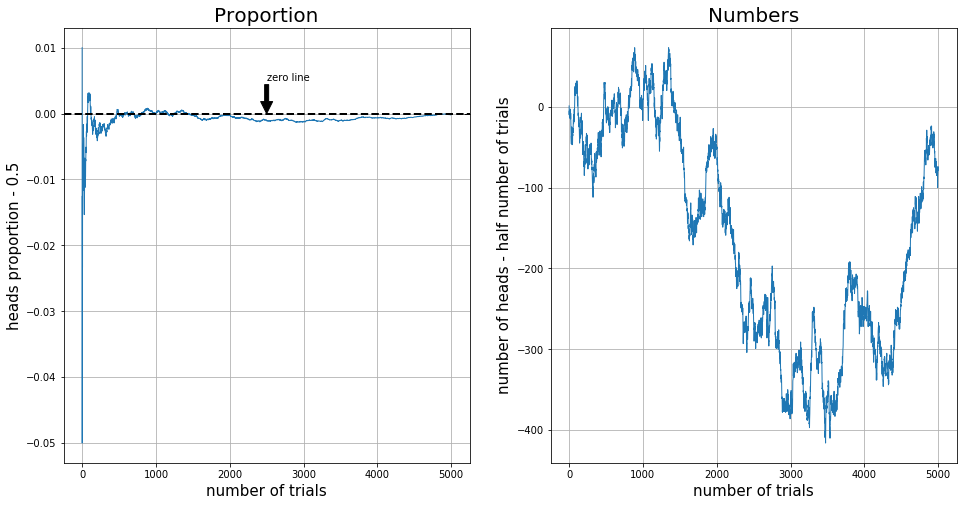

In [5]:
trials = 5000
props, nums = e1(trials)
gridspec.GridSpec(1,2)
plt.figure(figsize=(16,8))
title = ['']
for idx in range(2):
    plt.subplot2grid((1,2), (0,idx), colspan=1, rowspan=1)
    data = props if idx == 0 else nums
    plot_line(
                data=data, 
                title='Proportion' if not idx else 'Numbers',
                xlabel='number of trials',
                ylabel='heads proportion - 0.5' if not idx else 'number of heads - half number of trials',
                hline = {
                            'xy': (trials//2, 0),
                            'pos': 0,
                            'xytext': (trials//2, max(data)/2),
                            'msg': 'zero line'
                        } if not idx else None
             )
plt.show()
del data, props, nums

<font color='green' face='bold' size=5>
    From above, it can be inferred that as number of trials (n) increases, the [proportion of heads - 0.5] approaches 0, however, [number of heads - half the number of trial] does not.
</font>

# 2
<font color='red' size=5>
Modify the program CoinTosses so that it tosses a coin n times and records
whether or not the proportion of heads is within .1 of .5 (i.e., between .4
and .6). Have your program repeat this experiment 100 times. About how
large must n be so that approximately 95 out of 100 times the proportion of
heads is between .4 and .6?
</font>

In [6]:
check = np.vectorize(lambda x: 0.4 < x < 0.6)

def calc_prop(arr):
    return np.mean(check(rollling_avg(arr)).astype(int), axis=-1)

def e2(num_tosses, num_exps=8):
    toss_results = np.random.choice(range(2), size=num_tosses*num_exps*100)
    exps = np.array(np.split(toss_results, num_tosses*num_exps))
    exps = np.array([calc_prop(arr) for arr in np.split(exps, num_exps)])
    return exps.T

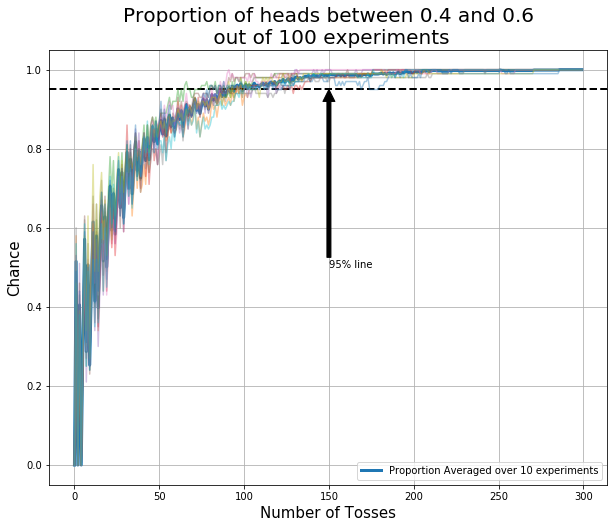

In [7]:
trials = 10
total_tosses = 300
data_all = e2(total_tosses, num_exps=trials)
data = np.mean(data_all, axis=-1)
plt.figure(figsize=(10,8))
plot_line(
        data=data, 
        title='Proportion of heads between 0.4 and 0.6\n out of 100 experiments',
        xlabel='Number of Tosses',
        ylabel='Chance',
        hline = {
                    'xy': (total_tosses//2, 0.95),
                    'pos': 0.95,
                    'xytext': (total_tosses//2, max(data)/2),
                    'msg': '95% line'
                },
        thickness=3,
        label='Proportion Averaged over {} experiments'.format(trials)
)

for arr in data_all.T:
    plt.plot(range(arr.shape[0]), arr, alpha=0.4)

plt.legend(['Proportion Averaged over {} experiments'.format(trials)])

plt.show()
del data_all, data

<font color='green' face='bold' size=5>
    At about 100 tosses the threshold of 95% seems to have been crossed
</font>

# 3
<font color='red' size=5>
In the early 1600s, Galileo was asked to explain the fact that, although the
number of triples of integers from 1 to 6 with sum 9 is the same as the number
of such triples with sum 10, when three dice are rolled, a 9 seemed to come
up less often than a 10—supposedly in the experience of gamblers.
 <li> a) Write a program to simulate the roll of three dice a large number of
        times and keep track of the proportion of times that the sum is 9 and
        the proportion of times it is 10.</li>
    <li> b) Can you conclude from your simulations that the gamblers were correct? </li>
    
</font>

In [8]:
def e3(num_tosses, num_exps=100):
    dice_outcome = np.random.choice(range(1,7,1), size=num_tosses*num_exps*3)
    three_dice_sum = np.array([np.sum(out) for out in np.split(dice_outcome, num_tosses*num_exps)])
    exps = np.array(np.split(three_dice_sum, num_tosses))
    exps_9s = rollling_avg((exps == 9).astype(int))
    exps_10s = rollling_avg((exps == 10).astype(int))
    return exps_10s - exps_9s


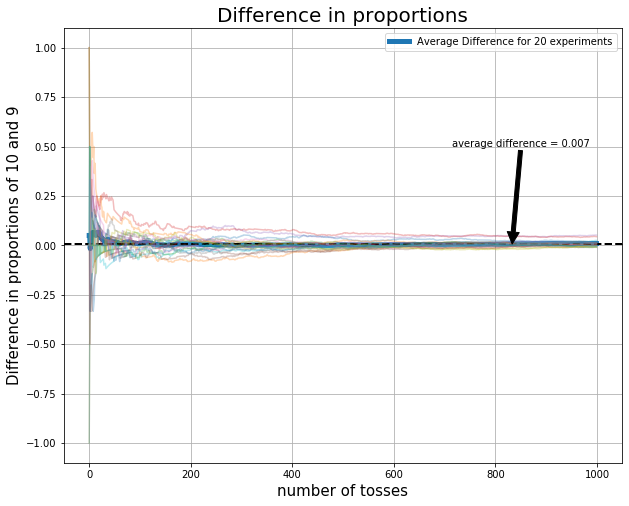

CPU times: user 1.14 s, sys: 178 ms, total: 1.32 s
Wall time: 1.03 s


In [9]:
%%time
trials = 20
total_tosses = 1000
data_all = e3(total_tosses, num_exps=trials)
data = np.mean(data_all, axis=-1)
plt.figure(figsize=(10,8))
plot_line(
        data=data, 
        title='Difference in proportions',
        xlabel='number of tosses',
        ylabel='Difference in proportions of 10 and 9',
        hline = {
                    'xy': (total_tosses//1.2, np.mean(data)),
                    'pos': np.mean(data),
                    'xytext': (total_tosses//1.4, 0.5),
                    'msg': 'average difference = {:.3f}'.format(np.mean(data))
                },
        thickness = 5,
        label= 'Average Difference for {} experiments'.format(trials)
)

for arr in data_all.T:
    plt.plot(range(arr.shape[0]), arr, alpha=0.3)

plt.legend(['Average Difference for {} experiments'.format(trials)])
    
plt.show()
del data_all, data

<font color='blue' size=4>A toss counts as 3 die rolls </font>

<font color='blue' size=4>The transparent plots are individual experiments and the thick plot is the average across all experiments</font>

<font color='green' face='bold' size=5>
    The average difference between the proportions of 9's and 10's converge to about 0.01. It seems that the gamblers were right
</font>

# 4
<font color='red' size=5>
In raquetball, a player continues to serve as long as she is winning; a point
is scored only when a player is serving and wins the volley. The first player
to win 21 points wins the game. Assume that you serve first and have a
probability .6 of winning a volley when you serve and probability .5 when
your opponent serves. Estimate, by simulation, the probability that you will
win a game.</font>

In [10]:
def e4(wins, loses, p):
    if wins == 21:
        return 'win'
    if loses == 21:
        return 'lose'
    
    outcome = np.random.choice(['win', 'lose'], size=1, p=[p, 1-p])[0]
    wins += 1 if outcome == 'win' else 0
    loses += 1 if outcome == 'lose' else 0
    p = 0.5 if outcome == 'lose' else 0.6
    return e4(wins, loses, p)

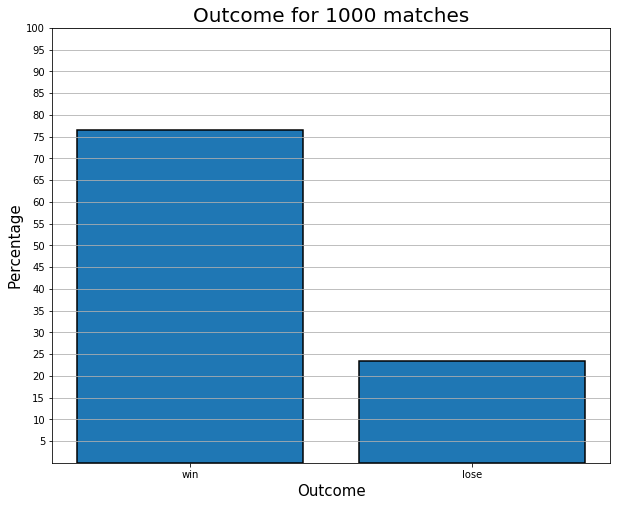

In [11]:
trials = 1000
data = [e4(0,0,0.6) for _ in range(trials)]
plt.figure(figsize=(10,8))
plot_bar(
    data=data,
    num_y_ticks=20,
    title='Outcome for {} matches'.format(trials),
    xlabel='Outcome',
    ylabel='Percentage'
)
plt.show()
del data

<font color='green' face='bold' size=5>
    The player wins around 75% of the total matches
</font>

# 5
<font color='red' size=5>
Consider the bet that all three dice will turn up sixes at least once in n rolls
of three dice. Calculate f (n), the probability of at least one triple-six when
three dice are rolled n times. Determine the smallest value of n necessary for
a favorable bet that a triple-six will occur when three dice are rolled n times.
(DeMoivre would say it should be about 216 log 2 = 149.7 and so would answer
150—see Exercise 1.2.17. Do you agree with him?)</font>

In [12]:
def e5(num_tosses, num_exps=100):
    dice_outcome = np.random.choice(range(1,7,1), size=num_tosses*num_exps*3)
    exps_outcome = np.logical_and.reduce(np.array(np.split(dice_outcome, num_tosses*num_exps)) == [6,6,6], axis=-1)
    exps_outcome = np.array(np.split(exps_outcome, num_tosses))
    exps_outcome = np.logical_or.accumulate(exps_outcome, axis=0)
    return np.mean(exps_outcome.astype(int), axis=-1)

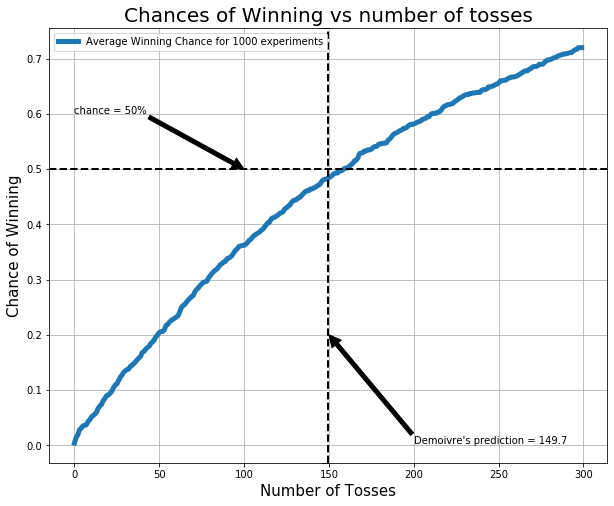

In [13]:
trials = 1000
total_tosses = 300
data = e5(total_tosses, num_exps=trials)
plt.figure(figsize=(10,8))
plot_line(
        data=data, 
        title='Chances of Winning vs number of tosses',
        xlabel='Number of Tosses',
        ylabel='Chance of Winning',
        vline = {
                    'xy': (150, 0.2),
                    'pos': 149.7,
                    'xytext': (200, min(data)/2),
                    'msg': "Demoivre's prediction = 149.7"
                },
        hline = {
                'xy': (100, 0.5),
                'pos': 0.5,
                'xytext': (0, max(data)/1.2),
                'msg': "chance = 50%"
            },
        thickness=5,
        label='Average Winning Chance for {} experiments'.format(trials)

)
plt.legend(['Average Winning Chance for {} experiments'.format(trials)])
plt.show()
del data

<font color='blue' size=4>A toss counts as 3 die rolls </font>

<font color='blue' size=4>Chance is calculated by averaging over all experiments</font>

<font color='green' face='bold' size=5>
    From above it can be inferred that after about 150 tosses the chance of winning is more than 50% and increases
    consistently. Therefore the game becomes increasingly in favor after 150 tosses.
</font>

# 6
<font color='red' size=5>
In Las Vegas, a roulette wheel has 38 slots numbered 0, 00, 1, 2, . . . , 36. The
0 and 00 slots are green and half of the remaining 36 slots are red and half
are black. A croupier spins the wheel and throws in an ivory ball. If you bet
1 dollar on red, you win 1 dollar if the ball stops in a red slot and otherwise
you lose 1 dollar. Write a program to find the total winnings for a player who
makes 1000 bets on red.
    </font>

In [14]:
def e6(num_bets, num_exps=10):
    win_amounts = np.random.choice([1, -1], size=num_bets*num_exps, p=[18/38, 20/38])
    win_amounts = np.array(np.split(win_amounts, num_bets))
    return np.cumsum(win_amounts, axis=0)

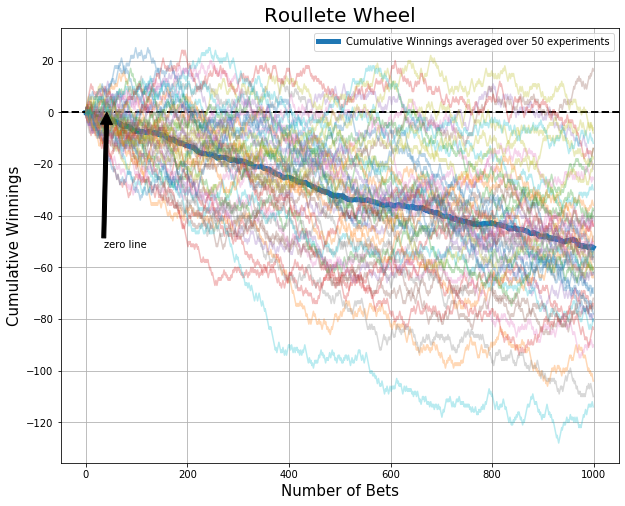

Total winnings averaged over 50 experiments = -52.32


In [15]:
trials = 50
total_tosses = 1000
data_all = e6(total_tosses, num_exps=trials)
data = np.mean(data_all, axis=-1)
plt.figure(figsize=(10,8))
plot_line(
        data=data, 
        title='Roullete Wheel',
        xlabel='Number of Bets',
        ylabel='Cumulative Winnings',
        hline = {
                    'xy': (trials//1.2, 0),
                    'pos': 0,
                    'xytext': (trials//1.4, min(data)),
                    'msg': 'zero line'
                },
        thickness = 5,
        label = 'Cumulative Winnings averaged over {} experiments'.format(trials)
)

for arr in data_all.T:
    plt.plot(range(arr.shape[0]), arr, alpha=0.3)

    plt.legend(['Cumulative Winnings averaged over {} experiments'.format(trials)])

plt.show()
print('Total winnings averaged over {} experiments = {}'.format(trials, data[-1]))
del data_all, data

# 7
<font color='red' size=5>
Another form of bet for roulette is to bet that a specific number (say 17) will
turn up. If the ball stops on your number, you get your dollar back plus 35
dollars. If not, you lose your dollar. Write a program that will plot your
winnings when you make 500 plays of roulette at Las Vegas, first when you
bet each time on red (see Exercise 6), and then for a second visit to Las
Vegas when you make 500 plays betting each time on the number 17. What
differences do you see in the graphs of your winnings on these two occasions?    </font>

In [16]:
def e7(num_bets, num_exps=10):
    win_amounts = np.random.choice([18, -1], size=num_bets*num_exps, p=[1/38, 37/38])
    win_amounts = np.cumsum(np.array(np.split(win_amounts, num_bets)), axis=0)
    return win_amounts

<Figure size 1440x576 with 0 Axes>

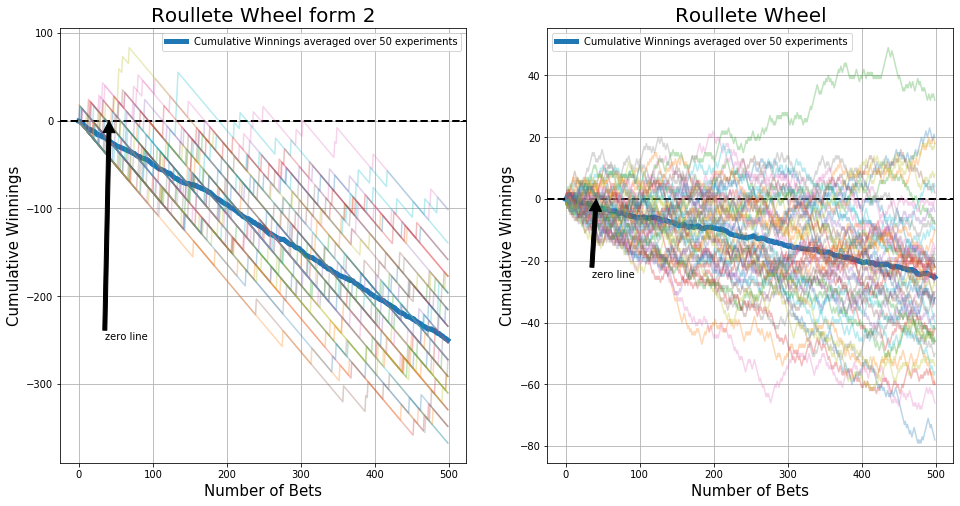

In [17]:
trials = 50
total_tosses = 500
plt.figure(figsize=(20,8))
gridspec.GridSpec(1,2)
plt.figure(figsize=(16,8))
title = ['']
for idx in range(2):
    plt.subplot2grid((1,2), (0,idx), colspan=1, rowspan=1)
    data_all = e7(total_tosses, num_exps=trials) if not idx else e6(total_tosses, num_exps=trials)
    data = np.mean(data_all, axis=-1)
    plot_line(
            data=data, 
            title='Roullete Wheel form 2' if not idx else 'Roullete Wheel',
            xlabel='Number of Bets',
            ylabel='Cumulative Winnings',
            hline = {
                        'xy': (trials//1.2, 0),
                        'pos': 0,
                        'xytext': (trials//1.4, min(data)),
                        'msg': 'zero line'
                    },
            thickness = 5,
            label = 'Cumulative Winnings averaged over {} experiments'.format(trials)
    )

    for arr in data_all.T:
        plt.plot(range(arr.shape[0]), arr, alpha=0.3)

        plt.legend(['Cumulative Winnings averaged over {} experiments'.format(trials)])
plt.show()
del data_all, data

<font color='green' face='bold' size=5>
The slope for roullete wheel form 2 is steeper, which means that, on average, the player loses more rapidly with each bet
</font>

# 8
<font color='red' size=5>
An astute student noticed that, in our simulation of the game of heads or tails
(see Example 1.4), the proportion of times the player is always in the lead is
very close to the proportion of times that the player’s total winnings end up 0.
Work out these probabilities by enumeration of all cases for two tosses and
for four tosses, and see if you think that these probabilities are, in fact, the
same.
</font>

In [18]:
def calc_lead(a,b):
    return 1 if b > a else 0

calc_lead = np.frompyfunc(calc_lead, 2, 1)

def e8(num_tosses, num_exps=10):
    win_amounts = np.random.choice([1,-1], size=num_tosses*num_exps)
    win_amounts = np.array(np.split(win_amounts, num_tosses))
    cum_win_amounts = np.cumsum(win_amounts, axis=0)
    leads = (np.sum((cum_win_amounts >= 0).astype(int), axis=0) == num_tosses).astype(int)
    wins_leads = np.array([(cum_win_amounts[-1,:] == 0).astype(int), leads])
    return rollling_avg(wins_leads.T)

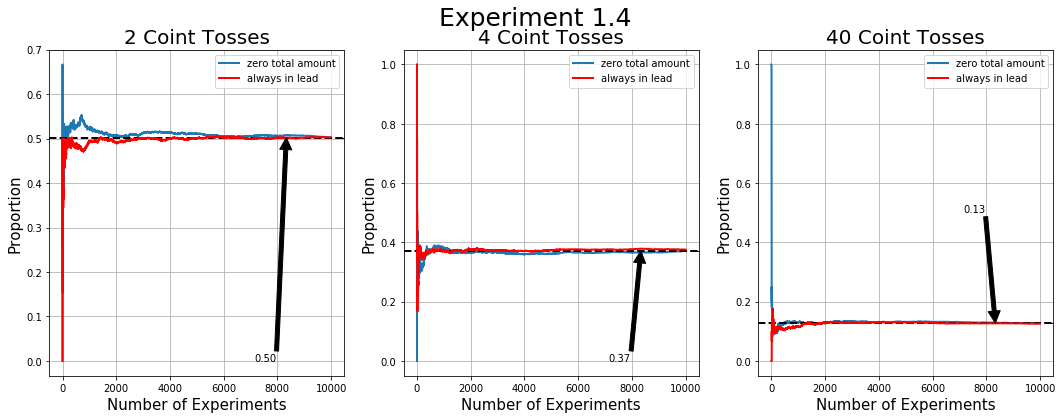

In [19]:
trials = 10000
plt.figure(figsize=(18,6))
gridspec.GridSpec(1,3)
plt.suptitle('Experiment 1.4', fontsize=25)
for idx, tosses in enumerate([2, 4, 40]):
    plt.subplot2grid((1,3), (0,idx), colspan=1, rowspan=1)
    wins_leads = e8(tosses, num_exps=trials).T.tolist()
    zero_total_win_plot = plot_line(
            data=wins_leads[0], 
            title='{} Coint Tosses'.format(tosses),
            xlabel='Number of Experiments',
            ylabel='Proportion',
            hline = {
                        'xy': (trials//1.2, wins_leads[0][-1]),
                        'pos': wins_leads[0][-1],
                        'xytext': (trials//1.4, wins_leads[0][0]/2),
                        'msg': '{:.2f}'.format(wins_leads[0][-1])
                    },
            thickness = 2,
            label = 'zero total amount'
    )
    always_lead_plot = plt.plot(range(trials), wins_leads[1], linewidth=2, label='always in lead', color='red')
    plt.legend([zero_total_win_plot[0], always_lead_plot[0]], ['zero total amount', 'always in lead'])
plt.show()
del wins_leads

<font color='green' face='bold' size=5>
Both plots converge to the same value (0.13, 0.38, 0.51) for (40, 4, 2) coin tosses, therefore the student's observation was correct
</font>

# 9
<font color='red' size=5>
The Labouchere system for roulette is played as follows. Write down a list of
numbers, usually 1, 2, 3, 4. Bet the sum of the first and last, 1 + 4 = 5, on
    red. If you win, delete the first and last numbers from your list. If you lose,
add the amount that you last bet to the end of your list. Then use the new
list and bet the sum of the first and last numbers (if there is only one number,
bet that amount). Continue until your list becomes empty. Show that, if this
happens, you win the sum, 1 + 2 + 3 + 4 = 10, of your original list. Simulate
this system and see if you do always stop and, hence, always win. If so, why
is this not a foolproof gambling system?
</font>

In [20]:
def e9(arr):
    wins = []
    while arr:
        amount = arr[0] + arr[-1] if len(arr) > 1 else arr[0]
        result = np.random.choice(['win', 'lose'], p=[18/38, 20/38])
        wins.append(amount if result == 'win' else -amount)
        arr = arr + [amount] if result == 'lose' else arr[1:-1] if len(arr) > 1 else []
    return np.cumsum(wins)

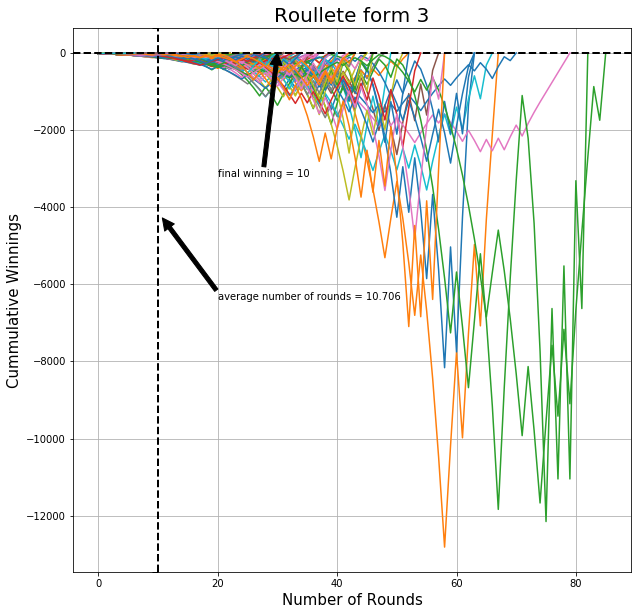

Final Winnings averaged over 1000 rounds = 10.0
The maximum number of rounds = 86


In [21]:
trials = 1000
lengths = []
arr = [1,2,3,4]
plt.figure(figsize=(10,10))
min_ = 0
final_wins = []
for _ in range(trials):
    res = e9(arr)
    lengths.append(len(res))
    plt.plot(range(len(res)), res)
    final_wins.append(res[-1])
    min_ = min(min_, min(res))

plt.axhline(0, color='black', linestyle='--', marker=0, linewidth=2)
plt.annotate('final winning = {}'.format(sum(arr)), 
             xy=(30, sum(arr)), 
             xytext=(20, min_/4),
             arrowprops=dict(facecolor='black', shrink=0))
plt.axvline(sum(arr), color='black', linestyle='--', marker=0, linewidth=2)
plt.annotate('average number of rounds = {}'.format(np.mean(lengths)), 
             xy=(np.mean(lengths), min_/3), 
             xytext=(20, min_/2),
             arrowprops=dict(facecolor='black', shrink=0))

labels(title='Roullete form 3',
      xlabel='Number of Rounds',
      ylabel='Cummulative Winnings')

plt.grid(True)
plt.show()
print('Final Winnings averaged over {} rounds = {}'.format(trials, np.mean(final_wins)))
print('The maximum number of rounds = {}'.format(max(lengths)))
del lengths, min_, final_wins

<font color='green' face='bold' size=5>
The final winning will be equal to the sum of the initial array.
   
Maximum number of rounds can be 131 therefore it seems the array is bound to get empty
</font>

# 10
<font color='red' size=5>
Another well-known gambling system is the martingale doubling system. Sup-
pose that you are betting on red to turn up in roulette. Every time you win,
bet 1 dollar next time. Every time you lose, double your previous bet. Suppose
that you use this system until you have won at least 5 dollars or you have lost
more than 100 dollars. Write a program to simulate this and play it a number
of times and see how you do. In his book The Newcomes, W. M. Thack-
eray remarks “You have not played as yet? Do not do so; above all avoid a
martingale if you do.” 10 Was this good advice?
</font>

In [22]:
def e10():
    def round_sim(bet, total_wins):
        if total_wins >= 5 or total_wins <= -100:
            return total_wins
        outcome = np.random.choice(['red'] * 18 + ['black'] * 18 + ['blank']*2, size=1)[0]
        wins.append(bet if outcome == 'red' else -bet)
        bets.append(bet)
        total_wins += bet if outcome == 'red' else -bet
        return round_sim(bet if outcome=='red' else 2*bet, total_wins)
        
    wins = []
    bets = [1]
    total_wins = round_sim(1, 0)
    
    return wins, bets

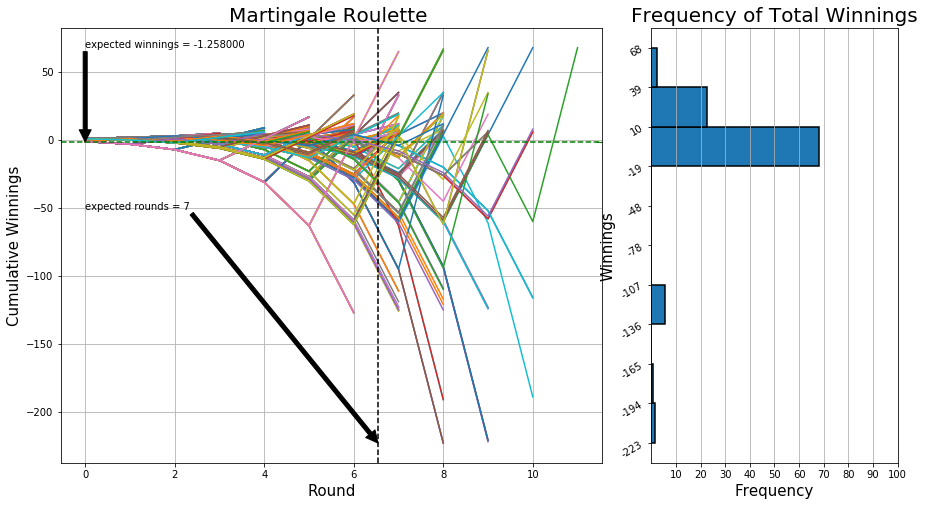

In [23]:
trials = 500
fig = plt.figure(1,figsize=(15,8))
gridspec.GridSpec(1,3)
plt.subplot2grid((1,3), (0,0), colspan=2, rowspan=1)
round_lengths = []
avg_winnings = []
final_scores = []
min_winning = 0
for _ in range(trials):
    winnings,bets = e10()
    avg_winnings.append(np.mean(winnings))
    winnings = np.cumsum(winnings)
    round_lengths.append(len(winnings))
    final_scores.append(winnings[-1])
    plt.plot(range(len(winnings)), winnings)
    min_winning = min_winning if min_winning < min(winnings) else min(winnings)

plt.axhline(np.mean(final_scores), color='green', linestyle='--', marker=0)
plt.axvline(np.mean(round_lengths), color='black', linestyle='--')

plt.annotate('expected rounds = {}'.format(math.ceil(np.mean(round_lengths))), 
             xy=(np.mean(round_lengths), min_winning),
             xytext=(0, np.mean(final_scores) - 50),
             arrowprops=dict(facecolor='black', shrink=2))

plt.annotate('expected winnings = {:2F}'.format(np.mean(final_scores)), 
             xy=(0, np.mean(final_scores)), 
             xytext=(0, max(final_scores)),
             arrowprops=dict(facecolor='black', shrink=2))


plt.title('Martingale Roulette '.format(trials), fontdict={'fontsize': 20})
plt.ylabel('Cumulative Winnings', fontdict={'fontsize': 15})
plt.xlabel('Round', fontdict={'fontsize': 15})

plt.grid(True)

plt.subplot2grid((1,3), (0,2), colspan=1, rowspan=1)

plot_hist(
    data=final_scores,
    num_bins=10,
    num_y_ticks=10,
    title='Frequency of Total Winnings',
    ylabel='Winnings',
    xlabel='Frequency',
    rotate=True
)

del round_lengths, avg_winnings, final_scores, min_winning

# 11
<font color='red' size=5>
Modify the program HTSimulation so that it keeps track of the maximum of
Peter’s winnings in each game of 40 tosses. Have your program print out the
proportion of times that your total winnings take on values 0, 2, 4, . . . , 40.
Calculate the corresponding exact probabilities for games of two tosses and
four tosses.
</font>

In [24]:
def e11(num_tosses, num_exps=10):
    win_amounts = np.random.choice([1,-1], size=num_tosses*num_exps)
    win_amounts = np.array(np.split(win_amounts, num_tosses))
    win_amounts = np.sum(win_amounts, axis=0)
    return {idx: np.sum((win_amounts == idx).astype(int)) for idx in range(0,42,2)}

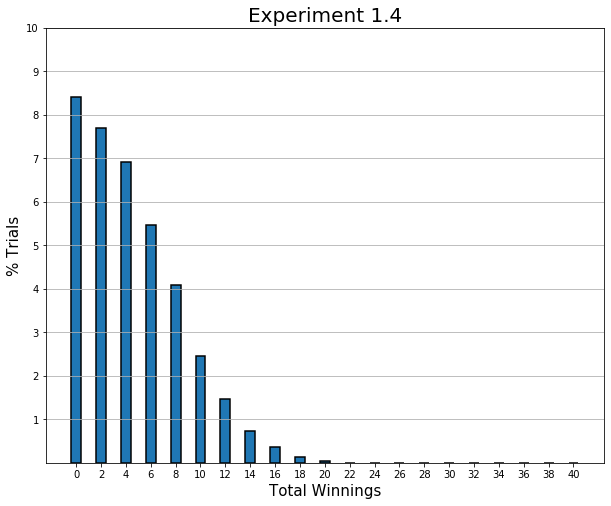

In [25]:
trials=10000
plt.figure(figsize=(10,8))
plot_bar(
    data = e11(40, num_exps=trials),
    num_trials=trials,
    num_y_ticks=10,
    cap=0.15,
    title='Experiment 1.4',
    xlabel='Total Winnings',
    ylabel='% Trials'
)
plt.show()

# 12
<font color='red' size=5>
In an upcoming national election for the President of the United States, a
pollster plans to predict the winner of the popular vote by taking a random
sample of 1000 voters and declaring that the winner will be the one obtaining
the most votes in his sample. Suppose that 48 percent of the voters plan
to vote for the Republican candidate and 52 percent plan to vote for the
Democratic candidate. To get some idea of how reasonable the pollster’s
plan is, write a program to make this prediction by simulation. Repeat the
simulation 100 times and see how many times the pollster’s prediction would
come true. Repeat your experiment, assuming now that 49 percent of the
population plan to vote for the Republican candidate; first with a sample of
1000 and then with a sample of 3000. (The Gallup Poll uses about 3000.)
(This idea is discussed further in Chapter 9, Section 9.1.)
</font>

<font color='blue' size=4>
    Since 52% of people plan to vote for Democrats, therefore, the Democrats will actually be the winner
</font>

In [26]:
def e12(num_trials, p, num_exps=10):
    outcomes = np.random.choice([1, 0], size=num_trials*num_exps, p=[p, 1-p])
    outcomes = np.array(np.split(outcomes, num_trials))
    outcomes = (np.mean(outcomes, axis=0) > 0.5).astype(int)
    return np.vectorize(lambda x: 'Wrong' if x else 'Right')(outcomes)

In [27]:
Counter(e12(1000, 0.48, num_exps=100))

Counter({'Right': 90, 'Wrong': 10})

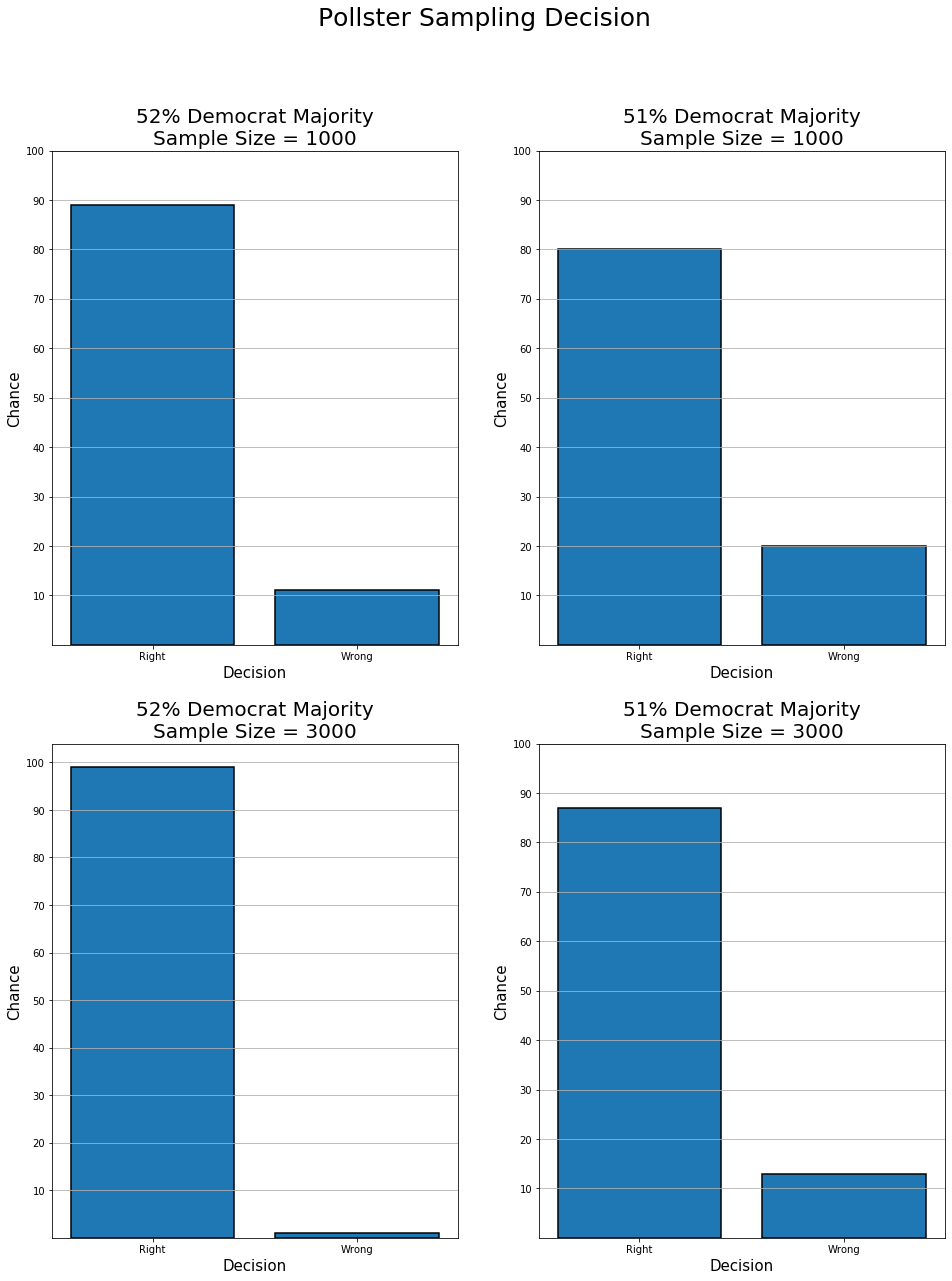

In [28]:
num_exps = 100
fig = plt.figure(1,figsize=(16,20))
plt.suptitle('Pollster Sampling Decision', fontsize=25)

gridspec.GridSpec(2,2)
for idx_a, exps in enumerate([1000, 3000]):
    for idx, prob in enumerate([0.48, 0.49]):
        plt.subplot2grid((2,2), (idx_a,idx), colspan=1, rowspan=1)
        outcomes = e12(exps, prob, num_exps=100)
        plot_bar(
            data=outcomes,
            title='{:.0f}% Democrat Majority\nSample Size = {}'.format((1-prob)*100, exps),
            xlabel='Decision',
            ylabel='Chance'
        )
plt.show()

# 13
<font color='red' size=5>
The psychologist Tversky and his colleagues 11 say that about four out of five
people will answer (a) to the following question:
A certain town is served by two hospitals. In the larger hospital about 45
babies are born each day, and in the smaller hospital 15 babies are born each
day. Although the overall proportion of boys is about 50 percent, the actual
proportion at either hospital may be more or less than 50 percent on any day.
    At the end of a year, which hospital will have the greater number of days on
which more than 60 percent of the babies born were boys?
    <li>the large hospital</li>
<li>the small hospital</li>
    <li>neither—the number of days will be about the same.</li>
Assume that the probability that a baby is a boy is .5 (actual estimates make
this more like .513). Decide, by simulation, what the right answer is to the
question. Can you suggest why so many people go wrong?
</font>

In [29]:
def e13(num_babies, num_days= 100, p=0.5, num_exps=1):
    outcomes = np.random.choice([1, 0], size=num_babies*num_days*num_exps, p=[p,1-p])
    outcomes = np.mean(np.array(np.split(outcomes, num_days*num_exps)), axis=-1)
    outcomes = np.mean(np.array(np.split(outcomes, num_days)), axis=-1)
    outcomes = (np.mean(np.array(np.split(outcomes, num_days)), axis=-1) > 0.6).astype(int)
    return np.vectorize(lambda x: '> 60' if x else '< 60')(outcomes)

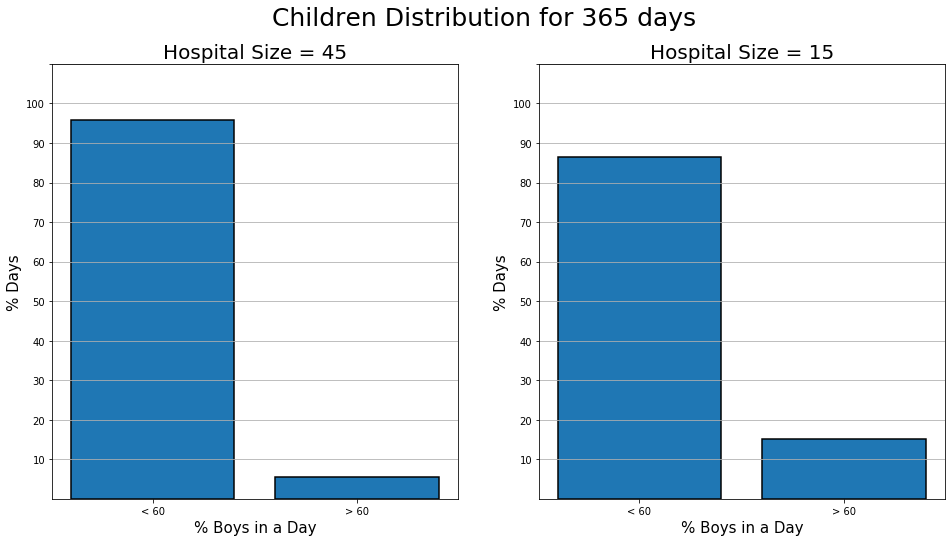

In [30]:
num_days = 365
p_boy = 0.5
fig = plt.figure(1,figsize=(16,8))
plt.suptitle('Children Distribution for {} days'.format(num_days), fontsize=25)

gridspec.GridSpec(1,2)
for idx, hosp_size in enumerate([45, 15]):
    plt.subplot2grid((1,2), (0,idx), colspan=1, rowspan=1)
    outcomes = e13(hosp_size, num_days=num_days, p=p_boy)
    plot_bar(
        data=outcomes,
        title='Hospital Size = {}'.format(hosp_size),
        xlabel='% Boys in a Day',
        ylabel='% Days'
    )
plt.show()

<font color='green' face='bold' size=5>
The graph suggests that second option is correct. 
    
Since smaller hospital size means a small sample of children per day, the variablity in sample mean will be higher for small hospital. Therefore the sample mean (percentage of boys) will be away from the actual mean (0.5) more number of times.
</font>

# 14
<font color='red' size=5>
You are offered the following game. A fair coin will be tossed until the first
time it comes up heads. If this occurs on the jth toss you are paid 2 j dollars.
You are sure to win at least 2 dollars so you should be willing to pay to play
this game—but how much? Few people would pay as much as 10 dollars to
play this game. See if you can decide, by simulation, a reasonable amount
that you would be willing to pay, per game, if you will be allowed to make
a large number of plays of the game. Does the amount that you would be
willing to pay per game depend upon the number of plays that you will be
allowed?
</font>

In [31]:
max_accumulater = np.frompyfunc(lambda a,b: max(a,b), 2, 1)
def e14(num_tosses, num_games = 100, num_exps=10):
    outcomes = np.random.choice([0,1], size=num_tosses*num_exps*num_games).astype(np.int16)
    outcomes = outcomes.reshape(num_exps, num_games, num_tosses)
    lengths = np.argmax(outcomes == 1, axis=-1) + 1
    pay_offs = (2 ** lengths).T
    return rollling_avg(pay_offs), np.mean(pay_offs, axis=0)
    return max_accumulater.accumulate(pay_offs.astype(object), axis=0).astype(int), np.mean(pay_offs, axis=0)
    #return rollling_avg(pay_offs)

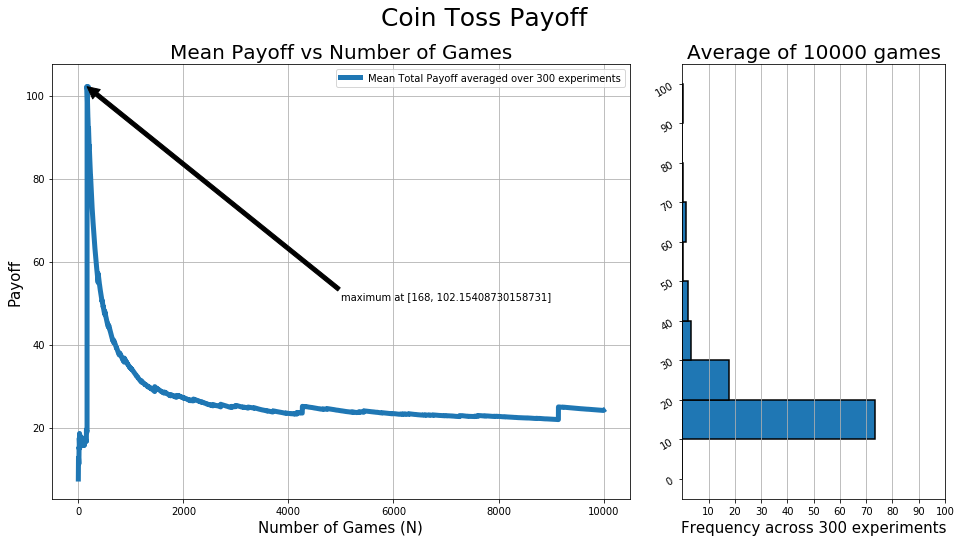

In [32]:
num_tosses = 100
num_exps = 300
num_games = 10000
data, avg_payoff = e14(num_tosses, num_games=num_games, num_exps=num_exps)
mean = np.mean(data, axis=-1)

fig = plt.figure(1,figsize=(16,8))
plt.suptitle('Coin Toss Payoff', fontsize=25)

gridspec.GridSpec(1,3)
plt.subplot2grid((1,3), (0,0), colspan=2, rowspan=1)
plot_line(
    data = mean,
    title='Mean Payoff vs Number of Games',
    ylabel='Payoff',
    xlabel='Number of Games (N)',
    thickness=5,
    label='Mean (Average Payoff across N Games) over {} experiments'.format(num_exps)
)

plt.scatter([np.argmax(mean)], [np.max(mean)])
plt.annotate('maximum at [{}, {}]'.format(np.argmax(mean)+1, np.max(mean)), 
             xy=(np.argmax(mean), np.max(mean)), 
             xytext=(num_games//2, np.max(mean)//2),
             arrowprops=dict(facecolor='black', shrink=2))

# for idx in np.random.choice(range(num_exps), replace=False, size=5):
#     plt.plot(range(len(data[:,idx])), data[:,idx], alpha=0.5)

plt.legend(['Mean Total Payoff averaged over {} experiments'.format(num_exps)])
    
plt.subplot2grid((1,3), (0,2), colspan=1, rowspan=1)
plot_hist(
    data=avg_payoff,
    num_bins=10,
    num_y_ticks=10,
    title='Average of {} games'.format(num_games),
    ylabel='',
    xlabel='Frequency across {} experiments'.format(num_exps),
    rotate=True,
    x_range=(0,100)
)
plt.show()
del data, avg_payoff

<font color='green' face='bold' size=5>
The mean payoff across 20000 games is expected to fall in 10-30 range approximately (70+20)90% of the times. So a player can bet around 10-30 for breaking even 90% of the time.
</font> 

<font color='green' face='bold' size=5>
The mean payoffs averaged over 300 experiments spikes sometimes and then converges as the number of games increase. The maximum value across all spikes is at 467 games, which means that, if the player plays 168 games then they will win 102.16 in each round on average. So on average, the total payoff will be $168 \cdot (102.16-10) = 15482.5$. However, these spikes are rare and on average the player will win around 22. So the player should pay same amount regardless of the number of games
</font>

# 15
<font color='red' size=5>
Tversky and his colleagues 12 studied the records of 48 of the Philadelphia
76ers basketball games in the 1980–81 season to see if a player had times
when he was hot and every shot went in, and other times when he was cold
and barely able to hit the backboard. The players estimated that they were
about 25 percent more likely to make a shot after a hit than after a miss.
In fact, the opposite was true—the 76ers were 6 percent more likely to score
after a miss than after a hit. Tversky reports that the number of hot and cold
streaks was about what one would expect by purely random effects. Assuming
that a player has a fifty-fifty chance of making a shot and makes 20 shots a
game, estimate by simulation the proportion of the games in which the player
will have a streak of 5 or more hits.
</font>

In [33]:
goal_accumulater = np.frompyfunc(lambda a,b: a+b if b>0 else 0, 2, 1)

def e15(num_shots=20, num_games=10):
    game_outcomes = np.random.choice([1, 0], size=num_shots*num_games).reshape(num_games, num_shots)
    game_outcomes = goal_accumulater.accumulate(game_outcomes.astype(object), axis=-1).astype(int)
    max_streak = np.max(game_outcomes, axis=-1)
    return np.vectorize(lambda x: '>= 5' if x else '< 5')(max_streak >= 5)

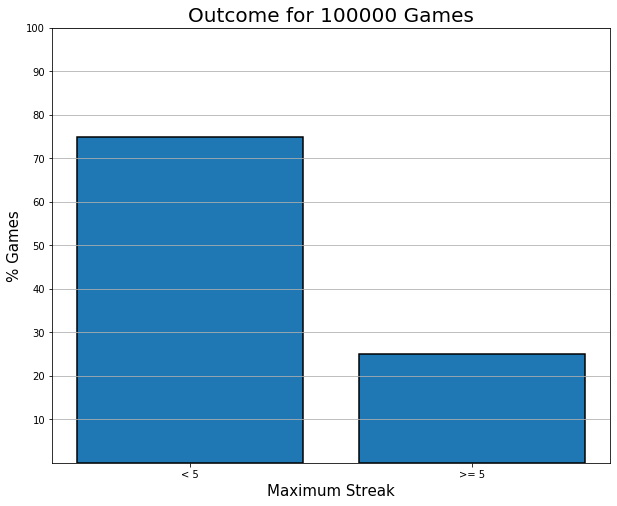

In [34]:
num_games=100_000
plt.figure(figsize=(10,8))
plot_bar(
    data = e15(num_games=num_games),
    num_y_ticks=10,
    title='Outcome for {} Games'.format(num_games),
    xlabel='Maximum Streak',
    ylabel='% Games'
)
plt.show()

# 16
<font color='red' size=5>
Estimate, by simulation, the average number of children there would be in
a family if all people had children until they had a boy. Do the same if all
people had children until they had at least one boy and at least one girl. How
many more children would you expect to find under the second scheme than
under the first in 100,000 families? (Assume that boys and girls are equally
likely.)
</font>

In [35]:
boy_accumulater = np.frompyfunc(lambda a, b: 'stop' if a == 'boy' else b, 2, 1)
boy_and_girl_accumulater = np.frompyfunc(
    lambda a,b: 'stop' if (a,b) in [('boy', 'girl'), ('girl', 'boy')] else b
                                         , 2,1)
def e16(max_children = 10, num_fam = 10, num_exps=2):
    outcomes = np.random.choice(['boy', 'girl'], size=num_fam*max_children*num_exps).reshape(num_exps, num_fam, max_children)
    stop_at_boy = boy_accumulater.accumulate(outcomes.astype(object), axis=-1)
    stop_at_both = boy_and_girl_accumulater.accumulate(outcomes.astype(object), axis=-1)
    del outcomes
    stop_at_boy = np.argmax(stop_at_boy == 'stop', axis=-1)
    stop_at_both = np.argmax(stop_at_both == 'stop', axis=-1) + 1
    return stop_at_boy, stop_at_both

In [36]:
until_one_boy, both = e16(max_children=1000, num_fam=100_000, num_exps=1)

In [37]:
'Average Children for scheme 1 = {:.1f}'.format(until_one_boy.mean())

'Average Children for scheme 1 = 2.0'

In [38]:
'Average Children for scheme 2 = {:.1f}'.format(both.mean())

'Average Children for scheme 2 = 3.0'

In [39]:
print('Scheme 2 would will result in {} more children than scheme 1'.format(both.sum() - until_one_boy.sum()))
del until_one_boy, both

Scheme 2 would will result in 100408 more children than scheme 1


<font color='green' face='bold' size=5>
For 1 lakh families, the average number of children in scheme 1 and 2 are 2 and 3 respectively. 
 
One would expect to find $(3-2) \cdot N$ children, where $N$ is the number of families. In this case the expected difference would be 1 lakh. Which is observed in the simulation
</font> 

# 17
<font color='red' size=5>
Mathematicians have been known to get some of the best ideas while sitting in
a cafe, riding on a bus, or strolling in the park. In the early 1900s the famous
mathematician George Pólya lived in a hotel near the woods in Zurich. He
liked to walk in the woods and think about mathematics. Pólya describes the
following incident:
    <li>At the hotel there lived also some students with whom I usually
took my meals and had friendly relations. On a certain day one
of them expected the visit of his fiancée, what (sic) I knew, but
I did not foresee that he and his fiancée would also set out for a
stroll in the woods, and then suddenly I met them there. And then
I met them the same morning repeatedly, I don’t remember how
many times, but certainly much too often and I felt embarrassed:
It looked as if I was snooping around which was, I assure you, not
the case.</li>

This set him to thinking about whether random walkers were destined to
meet.
    
Pólya considered random walkers in one, two, and three dimensions. In one
dimension, he envisioned the walker on a very long street. At each intersec-
tion the walker flips a fair coin to decide which direction to walk next (see
Figure 1.6a). In two dimensions, the walker is walking on a grid of streets, and
at each intersection he chooses one of the four possible directions with equal
probability (see Figure 1.6b). In three dimensions (we might better speak of
a random climber), the walker moves on a three-dimensional grid, and at each
intersection there are now six different directions that the walker may choose,
each with equal probability (see Figure 1.6c).

The reader is referred to Section 12.1, where this and related problems are
discussed.

<li>Write a program to simulate a random walk in one dimension starting
at 0. Have your program print out the lengths of the times between
returns to the starting point (returns to 0). See if you can guess from
this simulation the answer to the following question: Will the walker
always return to his starting point eventually or might he drift away
forever?</li>

The paths of two walkers in two dimensions who meet after n steps can
be considered to be a single path that starts at (0, 0) and returns to (0, 0)
after 2n steps. This means that the probability that two random walkers
in two dimensions meet is the same as the probability that a single walker
in two dimensions ever returns to the starting point. Thus the question
of whether two walkers are sure to meet is the same as the question of
whether a single walker is sure to return to the starting point.

<li>Write a program to simulate a random walk in two dimensions and see
if you think that the walker is sure to return to (0, 0). If so, Pólya would
be sure to keep meeting his friends in the park. Perhaps by now you
have conjectured the answer to the question: Is a random walker in one
or two dimensions sure to return to the starting point? Pólya answered this question for dimensions one, two, and three. He established the
remarkable result that the answer is yes in one and two dimensions and
no in three dimensions.
</li>
<li>
    Write a program to simulate a random walk in three dimensions and see
whether, from this simulation and the results of (a) and (b), you could
have guessed Pólya’s result.
    </li>

</font>

In [40]:
max_accumulator = np.frompyfunc(lambda a,b: max(a,b), 2, 1)
def e17(max_path_len=100, num_walks = 10, num_exps=10):
    outcomes = np.random.choice([1, -1], size=max_path_len*num_walks*num_exps).reshape(num_exps, num_walks, max_path_len)
    paths = np.argmax(outcomes.cumsum(axis=-1) == 0, axis=-1) + 1
    max_path_lens = max_accumulator.accumulate(paths.astype(object), axis=-1).astype(int)
    return (max_path_lens == max_path_len).astype(int)

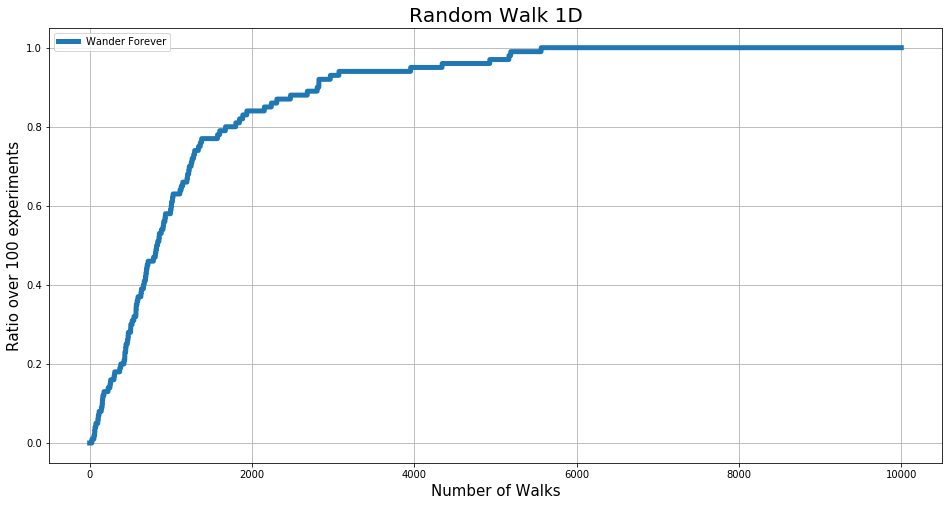

In [41]:
max_path_len = 100
num_walks = 10000
num_exps = 100
data = e17(max_path_len=max_path_len, num_walks=num_walks, num_exps=num_exps)
mean = np.mean(data, axis=0)

fig = plt.figure(1,figsize=(16,8))
plot_line(
    data = mean,
    title='Random Walk 1D',
    ylabel='Ratio over {} experiments'.format(num_exps),
    xlabel='Number of Walks',
    thickness=5,
    label='Wander Forever'
)

plt.legend(['Wander Forever'])
plt.show()

<font color='green' face='bold' size=5>
The above plot proves that it is possible to wander forever in a 1 Dimensional random walk, and as the number of walks increases so does the chance of wandering forever.
</font> 

In [42]:
convert = lambda x: np.array(list(map(int, str(x).split('_'))))
        
convert_back = lambda x: '_'.join(map(str, x))

cumsum_2d = np.frompyfunc(lambda a, b: convert_back(convert(a) + convert(b)), 2, 1)

def e17_b(max_path_len=100, num_walks=10):
    outcomes = np.random.choice(['0_1', '0_-1', '-1_0', '1_0'], 
                                size=max_path_len*num_walks).reshape(num_walks, max_path_len)
    walks = cumsum_2d.accumulate(outcomes.astype(object), axis=-1)
    del outcomes
    walks = (walks == '0_0').astype(int)
    return (walks.cumsum(axis=-1) > 0).astype(int)
    could_not_return = ((cumsum_2d.accumulate(outcomes.astype(object), axis=-1) == '0_0').astype(int).sum(axis=-1) == 0).astype(int)
    return rollling_avg(could_not_return.T)

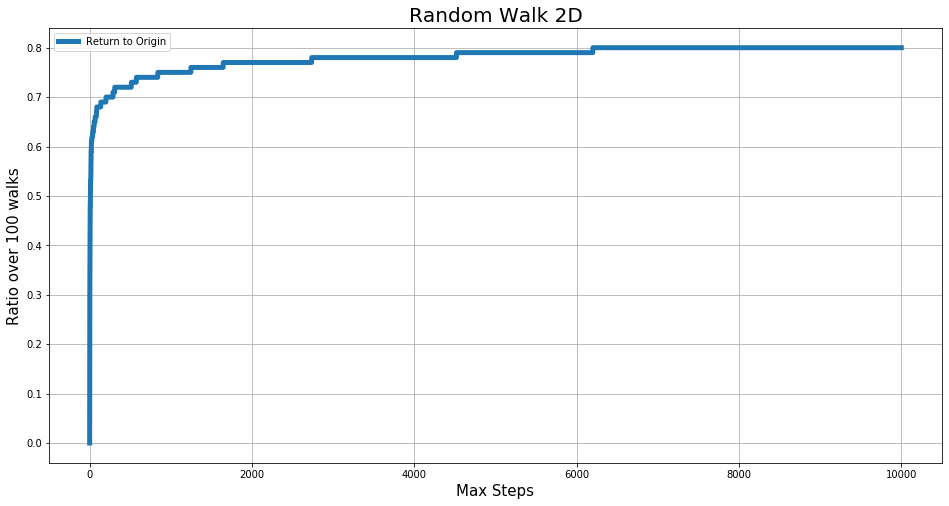

In [43]:
max_path_len = 100_00
num_walks = 100
data = e17_b(max_path_len=max_path_len, num_walks=num_walks)

fig = plt.figure(1,figsize=(16,8))
plot_line(
    data = np.mean(data, axis=0),
    title='Random Walk 2D',
    ylabel='Ratio over {} walks'.format(num_walks),
    xlabel='Max Steps',
    thickness=5,
    label='Return to Origin'
)


plt.legend(['Return to Origin'])
plt.show()

<font color='green' face='bold' size=5>
As the maximum allowed steps increases, so does the chance of returning to origin. This chance increases rapidly at first and slows down afterwards, suggesting that it could take a large number of steps to return to origin.
</font> 

In [44]:
cumsum_3d = np.frompyfunc(lambda a, b: convert_back(convert(a) + convert(b)), 2, 1)
all_dirs = [convert_back(vec) for mat in [np.eye(3, dtype=np.int8).tolist(), (-np.eye(3, dtype=np.int8)).tolist()] for vec in mat]
def e17_c(max_path_len=100, num_walks=10):
    outcomes = np.random.choice(all_dirs, size=max_path_len*num_walks).reshape(num_walks, max_path_len)
    walks = cumsum_3d.accumulate(outcomes.astype(object), axis=-1)
    del outcomes
    walks = (walks == '0_0_0').astype(int)
    return (walks.cumsum(axis=-1) > 0).astype(int)
    could_not_return = ((cumsum_2d.accumulate(outcomes.astype(object), axis=-1) == '0_0').astype(int).sum(axis=-1) == 0).astype(int)
    return rollling_avg(could_not_return.T)

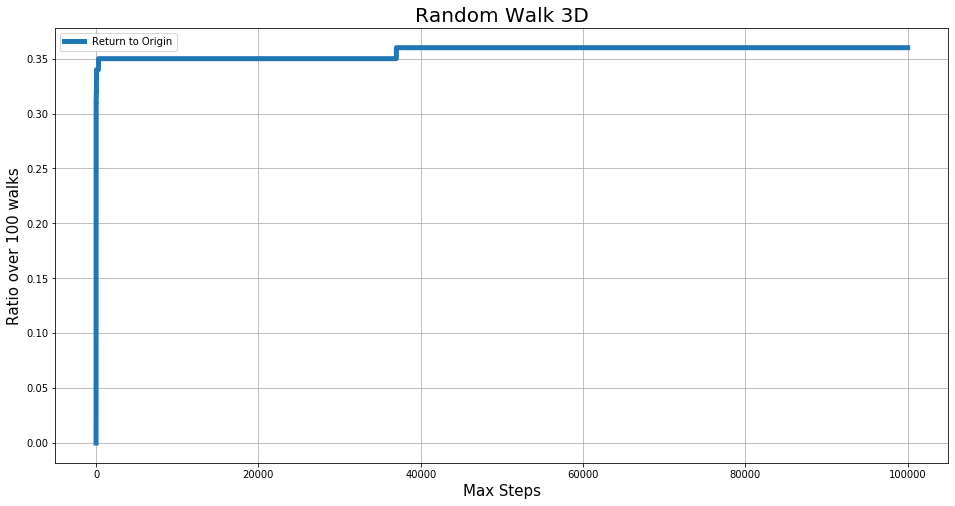

In [45]:
max_path_len = 100_000
num_walks = 100
data = e17_c(max_path_len=max_path_len, num_walks=num_walks)

fig = plt.figure(1,figsize=(16,8))
plot_line(
    data = np.mean(data, axis=0),
    title='Random Walk 3D',
    ylabel='Ratio over {} walks'.format(num_walks),
    xlabel='Max Steps',
    thickness=5,
    label='Return to Origin'
)


plt.legend(['Return to Origin'])
plt.show()

<font color='green' face='bold' size=5>
As the maximum allowed steps increases, the chance of returning to the origin increases at first and then converges to about 0.38. This means that 62% of the total walks resulted in wandering forever. So it is highly probable for a random walk in 3d to not end at origin.
</font> 